Statistics vademecum:
* **Precision**: fraction of true positives over all positives.
\begin{equation}
P = \frac{T_p}{T_p+F_p}
\end{equation}
* **Recall**: fraction of true positives over all "trues", i.e. true positives and false negatives.
\begin{equation}
R = \frac{T_p}{T_p+F_n}
\end{equation}
* **$F_1$ score**: harmonic mean of precision and recall.
\begin{equation}
F_1 = 2\frac{PR}{P+R}
\end{equation}

In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import h5py
import time
import joblib

from sklearn import ensemble, metrics, inspection

In [2]:
# if true, load existing model (does not train a new one)
load_existing = True

# if true, save the trained model
save_model = False

In [3]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

# Monte Carlo data
## Reconstructed events

In [4]:
inputMC = 'data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'
tickMC = time.perf_counter()
df_reco = pd.read_hdf(inputMC, key='LHCbMC_Lb')
tockMC = time.perf_counter()
print(f"Monte Carlo imported in {tockMC - tickMC:0.4f} seconds.")

Monte Carlo imported in 6.6995 seconds.


In [5]:
print("Tot. MC events:", len(df_reco))

Tot. MC events: 366396


In [6]:
print(*list(df_reco), sep='\n')

Lb_ENDVERTEX_X
Lb_ENDVERTEX_Y
Lb_ENDVERTEX_Z
L_ENDVERTEX_X
L_ENDVERTEX_Y
L_ENDVERTEX_Z
Jpsi_ENDVERTEX_X
Jpsi_ENDVERTEX_Y
Jpsi_ENDVERTEX_Z
L_PX
L_PY
L_PZ
Lb_PX
Lb_PY
Lb_PZ
Jpsi_PX
Jpsi_PY
Jpsi_PZ
p_PX
p_PY
p_PZ
pim_PX
pim_PY
pim_PZ
mum_PX
mum_PY
mum_PZ
mup_PX
mup_PY
mup_PZ
L_M
L_MM
Lb_M
Lb_MM
Jpsi_M
Jpsi_MM
Lb_BPVDIRA
Lb_BPVIPCHI2
Lb_BPVVDCHI2
Lb_VFASPF_CHI2_VDOF
L_BPVDIRA
L_BPVIPCHI2
L_BPVVDCHI2
L_VFASPF_CHI2_VDOF
Lb_OWNPV_X
Lb_OWNPV_Y
Lb_OWNPV_Z
Lb_OWNPV_CHI2
Lb_OWNPV_NDOF
L_ID
Lb_ID
Jpsi_ID
p_ID
pim_ID
mum_ID
mup_ID
DTF_FixJPsi_status
DTF_FixJPsi_Lb_M
DTF_FixJPsi_Lb_P
DTF_FixJPsi_chi2
DTF_FixJPsi_nDOF
DTF_FixJPsi_PV_key
DTF_FixJPsi_PV_X
DTF_FixJPsi_PV_Y
DTF_FixJPsi_PV_Z
DTF_FixJPsi_L_M
DTF_FixJPsi_L_P
DTF_FixJPsi_L_decayLength
DTF_FixJPsi_pim_PX
DTF_FixJPsi_pim_PY
DTF_FixJPsi_pim_PZ
DTF_FixJPsi_p_PX
DTF_FixJPsi_p_PY
DTF_FixJPsi_p_PZ
DTF_FixJPsi_mum_PX
DTF_FixJPsi_mum_PY
DTF_FixJPsi_mum_PZ
DTF_FixJPsi_mup_PX
DTF_FixJPsi_mup_PY
DTF_FixJPsi_mup_PZ
DTF_FixJPsiLambda_status
DTF_FixJPsiLam

## Truth events

In [7]:
tickMCTruth = time.perf_counter()
df_truth = pd.read_hdf(inputMC, key='LHCbMCTruth_Lb')
tockMCTruth = time.perf_counter()
print(f"Monte Carlo Truth imported in {tockMCTruth - tickMCTruth:0.4f} seconds.")

Monte Carlo Truth imported in 56.3138 seconds.


In [8]:
print("Tot. MCTruth events:", len(df_truth))

Tot. MCTruth events: 8921815


In [9]:
print(*list(df_truth), sep='\n')

MCTRUTH_Lb_ENDVERTEX_X
MCTRUTH_Lb_ENDVERTEX_Y
MCTRUTH_Lb_ENDVERTEX_Z
MCTRUTH_L_ENDVERTEX_X
MCTRUTH_L_ENDVERTEX_Y
MCTRUTH_L_ENDVERTEX_Z
MCTRUTH_p_PX
MCTRUTH_p_PY
MCTRUTH_p_PZ
MCTRUTH_pim_PX
MCTRUTH_pim_PY
MCTRUTH_pim_PZ
MCTRUTH_mum_PX
MCTRUTH_mum_PY
MCTRUTH_mum_PZ
MCTRUTH_mup_PX
MCTRUTH_mup_PY
MCTRUTH_mup_PZ
MCTRUTH_Lb_ID
MCTRUTH_L_ID
Lb_Reconstructible
Lb_Reconstructed
L_Reconstructible
L_Reconstructed
Jpsi_Reconstructible
Jpsi_Reconstructed
p_Reconstructible
p_Reconstructed
pim_Reconstructible
pim_Reconstructed
mum_Reconstructible
mum_Reconstructed
mup_Reconstructible
mup_Reconstructed
p_PP_X
p_PP_Y
p_PP_Z
p_PP_PX
p_PP_PY
p_PP_PZ
p_PP_Weight
pim_PP_X
pim_PP_Y
pim_PP_Z
pim_PP_PX
pim_PP_PY
pim_PP_PZ
pim_PP_Weight
mum_PP_X
mum_PP_Y
mum_PP_Z
mum_PP_PX
mum_PP_PY
mum_PP_PZ
mum_PP_Weight
mup_PP_X
mup_PP_Y
mup_PP_Z
mup_PP_PX
mup_PP_PY
mup_PP_PZ
mup_PP_Weight
Rec_key
N_rec_matches
TrackType


## Merge the dataframes

In [10]:
tickMerge = time.perf_counter()
df_MC = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
df_MC = df_MC.loc[(df_MC['MC_key'] >= 0) & (df_MC['Rec_key'] >= 0)]
tockMerge = time.perf_counter()
print(f"Monte Carlo merged in {tockMerge - tickMerge:0.4f} seconds.")

Monte Carlo merged in 4.0357 seconds.


In [11]:
df_MC

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.4798,-0.7758,18.706800,-785.810974,-591.072998,5157.507812,-5172.310059,-3904.530029,34147.730469,-470.119995,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.6829,-2.2522,-36.520901,94.709503,-270.525391,3823.881348,5635.350098,-15984.469727,230495.453125,604.909973,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
5,2.2347,-3.0136,-3.515400,-41.785000,-495.398499,2890.112793,-144.789993,-1430.229980,8650.469727,-27.309999,...,-514.345398,2560.247559,2766.051025,-6544.098633,37503.421875,4405.509766,-5917.182129,27155.025391,T,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.9741,0.2091,-11.659000,294.090698,39.875000,7125.287109,2412.750000,405.109985,60216.011719,395.200012,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.5103,1.2180,21.928400,-148.940399,123.715599,7319.557129,-1238.500000,978.909973,57653.351562,-45.599998,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.1275,-0.0589,25.113001,-123.851601,-28.034100,2985.664307,-6471.830078,-1487.530029,153226.906250,-561.440002,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


## Apply pre-selection cuts matching data

In [12]:
JPsi1SPDGMass = 3096.900

PionPCuts = (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) > 2000) & (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) < 5e5)
ProtonPCuts = (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) > 10000) & (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) < 5e5)
ProtonPTCuts = TransverseMomentumModulus(df_MC['p_PX'], df_MC['p_PY']) > 400
## Combined m(p-pi)? Seems to be "AM" in the DaVinci opt file
LambdaMCuts = (df_MC['L_M'] > 600) & (df_MC['L_M'] < 1500)
LambdaMMCuts = df_MC['L_MM'] < 1500
LambdaZCuts = (df_MC['L_ENDVERTEX_Z'] > 5500) & (df_MC['L_ENDVERTEX_Z'] < 8500)
LambdaDiraCuts = (df_MC['L_BPVDIRA'] > 0.9999)
LambdaBPVIPCHI2Cuts = df_MC['L_BPVIPCHI2'] < 200
LambdaBPVVDCHI2Cuts = df_MC['L_BPVVDCHI2'] < 2e7
LambdaChi2Cuts = df_MC['L_VFASPF_CHI2_VDOF'] < 750
JPsiMCuts = abs(df_MC['Jpsi_M'] - JPsi1SPDGMass) < 90
LambdaPTCuts = TransverseMomentumModulus(df_MC['L_PX'], df_MC['L_PY']) > 450
## Combined m(JpsiLambda)? See comment above
LambdabMCuts = (df_MC['Lb_M'] < 8500)
LambdabDiraCuts = abs(df_MC['Lb_BPVDIRA']) > 0.99
LambdabBPVIPCHI2Cuts = df_MC['Lb_BPVIPCHI2'] < 1750
LambdabChi2Cuts = df_MC['Lb_VFASPF_CHI2_VDOF'] < 150

df_MC_Filtered = df_MC.loc[
    PionPCuts &
    ProtonPCuts &
    ProtonPTCuts &
    LambdaMCuts &
    LambdaMMCuts &
    LambdaZCuts &
    LambdaDiraCuts &
    LambdaBPVIPCHI2Cuts &
    LambdaBPVVDCHI2Cuts &
    LambdaChi2Cuts &
    JPsiMCuts &
    LambdaPTCuts &
    LambdabMCuts &
    LambdabDiraCuts &
    LambdabBPVIPCHI2Cuts &
    LambdabChi2Cuts
]

df_MC_Filtered

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
8,0.5442,-0.4049,-30.064199,-237.463104,-161.438004,5029.397461,-1999.180054,-1447.800049,43812.398438,-599.280029,...,-151.918823,7139.517578,100.262436,999.515259,50033.699219,-120.737198,-995.344788,6822.337402,T,277
14,0.9904,-0.2075,-9.769600,224.561996,56.081600,5921.048828,2894.560059,699.140015,74302.851562,293.929993,...,104.645416,10220.954102,-884.967468,195.843964,34903.839844,1645.699585,-1113.117432,24484.212891,T,367
17,0.8236,-0.2738,28.986401,-296.374695,-100.123802,5963.561523,-1268.760010,-522.340027,25478.310547,-184.460007,...,20.153040,3543.737305,-829.315674,-926.117676,37815.328125,2614.833252,-1553.520630,63936.839844,T,493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366374,1.9930,-0.9682,33.883499,454.162109,-444.944794,6047.499512,7053.950195,-6800.229980,92633.132812,949.369995,...,-1059.302368,13806.107422,2310.392578,-2437.838867,42988.765625,2057.492432,-877.707703,10357.686523,T,8921400
366378,1.2187,-0.0757,-10.080700,120.471603,-69.038300,7221.361328,1256.689941,-628.059998,71476.546875,189.229996,...,-259.237457,19192.976562,1663.037476,477.534760,14450.500000,-812.013245,-604.744568,27734.162109,T,8921503
366382,1.1575,-0.3940,43.910599,4.075100,-146.877396,7409.937500,133.949997,-2934.969971,147684.812500,-69.339996,...,-295.752747,15403.834961,196.509079,-679.625732,6668.261719,3547.472900,-3286.872803,190998.375000,T,8921603


# Real data

In [13]:
inputData = 'data/Custom_Shuffled5e5_LHCbData_2016_MagUpDown_Dimuon_Ttracks.h5'

tickData = time.perf_counter()
df_Data = pd.read_hdf(inputData, key='LHCbData')
tockData = time.perf_counter()
print(f"Data imported found in {tockData - tickData:0.4f} seconds.")

Data imported found in 24.3579 seconds.


In [14]:
df_Data

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_PV_key,DTF_FixJPsiLambda_PIDSubs_PV_X,DTF_FixJPsiLambda_PIDSubs_PV_Y,DTF_FixJPsiLambda_PIDSubs_PV_Z,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ
0,0.741083,0.040052,51.522447,-183.292384,-43.859362,6490.082515,0.7439,0.0407,51.4959,-1962.289750,...,0.0,0.8736,-0.1967,48.166500,309.563354,-408.524475,34743.472656,-2211.389404,-110.629265,20956.490234
1,0.966530,1.056296,12.180388,460.300083,66.834128,7770.100444,0.9662,1.0572,12.2043,1394.350564,...,0.0,0.8501,-0.2092,-26.982300,1596.628906,3514.845459,104168.757812,-880.160461,658.744263,13403.822266
2,0.966233,1.057736,12.214956,-57.917475,-84.071053,5993.154473,0.9662,1.0572,12.2043,-428.321594,...,0.0,0.8501,-0.2092,-26.982300,1700.060669,3381.554932,100243.195312,-873.159973,657.834717,13182.185547
3,0.823661,0.118355,46.132318,618.389668,168.951341,7355.920185,0.8241,0.1180,46.1314,1451.342628,...,0.0,0.7951,-0.1776,44.437199,-1076.289917,1566.036987,8062.599609,2149.493652,2015.187012,11564.797852
4,1.115657,-0.125374,16.776287,238.067626,64.113430,7681.684115,1.1156,-0.1256,16.7798,2399.018104,...,0.0,0.8308,-0.2088,-5.163700,1367.081787,74.007980,38234.714844,-1429.765259,-1237.681396,38150.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502109,0.846524,-0.134417,32.394226,-64.169224,6.479162,5770.951530,0.8465,-0.1340,32.3945,-584.392519,...,0.0,0.8459,-0.1883,32.926998,556.332214,-1148.651367,10566.268555,512.927612,1943.064453,10574.164062
502110,0.871183,-0.286051,41.685312,34.181050,-103.878831,6986.884965,0.8709,-0.2864,41.6887,421.292007,...,0.0,0.8218,-0.2298,36.771099,445.235138,-514.793945,17956.791016,-2666.400391,-2992.653564,30364.205078
502111,0.870582,-0.286811,41.692622,-452.733867,61.078171,5891.824125,0.8709,-0.2864,41.6887,-3363.159232,...,0.0,0.8218,-0.2298,36.771099,468.523468,-513.491150,17915.718750,-2619.216064,-2997.929932,30253.095703
502112,-0.402430,-1.233937,-36.036206,-60.702877,89.445117,7273.999982,-0.3998,-1.2317,-36.0552,91.685951,...,0.0,0.8815,-0.2150,-45.118000,-9281.548828,-5284.185059,58504.699219,-1797.508667,-2812.620850,22225.533203


## Select side bands

In [15]:
df_Data_Sideband = df_Data.loc[df_Data['DTF_FixJPsiLambda_Lb_M'] > 5803]
df_Data_Sideband

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_PV_key,DTF_FixJPsiLambda_PIDSubs_PV_X,DTF_FixJPsiLambda_PIDSubs_PV_Y,DTF_FixJPsiLambda_PIDSubs_PV_Z,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ
9,0.954203,-0.344464,-53.680211,-262.045608,0.442579,5510.941369,0.9542,-0.3443,-53.6797,-1782.133090,...,0.0,0.8468,-0.2622,-54.893501,437.180298,2096.835693,11598.041992,1090.466187,-844.338867,13521.172852
10,0.594506,1.091681,4.248750,-130.962451,-12.215099,7696.425393,0.5944,1.0918,4.2498,-542.173222,...,1.0,0.7767,-0.1859,-8.075300,246.036743,-837.566833,18804.574219,-324.927582,2296.204346,21652.119141
11,0.510916,-0.100533,2.469290,-115.172428,-15.312432,7416.775760,0.5115,-0.1005,2.4713,-1604.083225,...,0.0,0.8078,-0.1900,-11.636300,-1915.078979,397.245697,40416.109375,1053.967896,-473.800598,14331.053711
12,-3.018767,-1.877033,116.476465,228.699716,60.309666,7438.445918,-3.0203,-1.8776,116.4960,470.992288,...,1.0,0.8418,-0.2003,56.337399,-4871.875977,-1851.765503,51975.703125,-3758.903076,-2457.851807,81130.992188
15,0.821776,-0.194724,-98.650781,704.486275,-114.239457,6479.514135,0.8206,-0.1960,-98.6433,2103.247630,...,0.0,0.8000,-0.2197,-98.998703,601.174988,459.194885,9058.416992,-953.844238,-2465.735107,11614.083984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502096,0.879724,-0.135972,-41.057133,93.670514,7.303664,5570.798979,0.8800,-0.1366,-41.0625,464.499500,...,0.0,0.8832,-0.1605,-41.536201,-1089.839722,486.843903,8835.775391,-1582.450806,4219.804199,93952.031250
502104,0.765221,-0.124892,17.330386,216.976241,-2.940979,7724.294733,0.7632,-0.1235,17.3599,1791.506655,...,0.0,0.8249,-0.1796,16.311600,-1585.558838,3039.507324,45262.421875,-297.524719,-777.621033,12218.561523
502109,0.846524,-0.134417,32.394226,-64.169224,6.479162,5770.951530,0.8465,-0.1340,32.3945,-584.392519,...,0.0,0.8459,-0.1883,32.926998,556.332214,-1148.651367,10566.268555,512.927612,1943.064453,10574.164062
502110,0.871183,-0.286051,41.685312,34.181050,-103.878831,6986.884965,0.8709,-0.2864,41.6887,421.292007,...,0.0,0.8218,-0.2298,36.771099,445.235138,-514.793945,17956.791016,-2666.400391,-2992.653564,30364.205078


# Preliminary work for training
## Missing features
Add transverse momentum.

In [16]:
df_MC_Filtered = df_MC_Filtered.assign(
    p_PT = TransverseMomentumModulus(df_MC_Filtered['p_PX'],df_MC_Filtered['p_PY']),
    DTF_FixJPsiLambda_p_PT = TransverseMomentumModulus(df_MC_Filtered['DTF_FixJPsiLambda_p_PX'], df_MC_Filtered['DTF_FixJPsiLambda_p_PY']),
    pim_PT = TransverseMomentumModulus(df_MC_Filtered['pim_PX'],df_MC_Filtered['pim_PY']),
    DTF_FixJPsiLambda_pim_PT = TransverseMomentumModulus(df_MC_Filtered['DTF_FixJPsiLambda_pim_PX'], df_MC_Filtered['DTF_FixJPsiLambda_pim_PY']),
    Jpsi_PT = TransverseMomentumModulus(df_MC_Filtered['Jpsi_PX'],df_MC_Filtered['Jpsi_PY'])
)

Only for MC data frame, it's also necessary to replace DTF flags with numbers matching those in the real data.

In [17]:
successDictionaryReverse = {
    'Success': 0.0,
    'Failed': 1.0,
    'NonConverged': 3.0
}

df_MC_Filtered.replace({'DTF_FixJPsi_status': successDictionaryReverse}, inplace=True)
df_MC_Filtered.replace({'DTF_FixJPsiLambda_status': successDictionaryReverse}, inplace=True)
df_MC_Filtered

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key,p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,1438.071777,1619.347290,23634.302734,T,0,3670.964844,2733.329834,311.089020,334.741455,1259.644897
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,71.893692,-2873.631348,73489.484375,T,29,962.454834,1095.172607,292.199097,278.820038,2350.277832
8,0.5442,-0.4049,-30.064199,-237.463104,-161.438004,5029.397461,-1999.180054,-1447.800049,43812.398438,-599.280029,...,-120.737198,-995.344788,6822.337402,T,277,6069.714355,354.068542,313.657623,456.626129,16.075375
14,0.9904,-0.2075,-9.769600,224.561996,56.081600,5921.048828,2894.560059,699.140015,74302.851562,293.929993,...,1645.699585,-1113.117432,24484.212891,T,367,3138.222168,2835.955811,563.971436,499.553711,1183.876953
17,0.8236,-0.2738,28.986401,-296.374695,-100.123802,5963.561523,-1268.760010,-522.340027,25478.310547,-184.460007,...,2614.833252,-1553.520630,63936.839844,T,493,1088.444824,1326.820923,503.365540,192.515366,3060.318604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366374,1.9930,-0.9682,33.883499,454.162109,-444.944794,6047.499512,7053.950195,-6800.229980,92633.132812,949.369995,...,2057.492432,-877.707703,10357.686523,T,8921400,9575.651367,9594.823242,1461.105103,1428.191162,5488.212402
366378,1.2187,-0.0757,-10.080700,120.471603,-69.038300,7221.361328,1256.689941,-628.059998,71476.546875,189.229996,...,-812.013245,-604.744568,27734.162109,T,8921503,1055.863892,1963.163696,429.001678,352.585876,855.027405
366382,1.1575,-0.3940,43.910599,4.075100,-146.877396,7409.937500,133.949997,-2934.969971,147684.812500,-69.339996,...,3547.472900,-3286.872803,190998.375000,T,8921603,4872.735840,1022.928284,265.291748,294.877197,5446.465820


In [18]:
df_Data_Sideband = df_Data_Sideband.assign(
    p_PT = TransverseMomentumModulus(df_Data_Sideband['p_PX'],df_Data_Sideband['p_PY']),
    DTF_FixJPsiLambda_p_PT = TransverseMomentumModulus(df_Data_Sideband['DTF_FixJPsiLambda_p_PX'], df_Data_Sideband['DTF_FixJPsiLambda_p_PY']),
    pim_PT = TransverseMomentumModulus(df_Data_Sideband['pim_PX'],df_Data_Sideband['pim_PY']),
    DTF_FixJPsiLambda_pim_PT = TransverseMomentumModulus(df_Data_Sideband['DTF_FixJPsiLambda_pim_PX'], df_Data_Sideband['DTF_FixJPsiLambda_pim_PY']),
    Jpsi_PT = TransverseMomentumModulus(df_Data_Sideband['Jpsi_PX'],df_Data_Sideband['Jpsi_PY'])
)

df_Data_Sideband

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT
9,0.954203,-0.344464,-53.680211,-262.045608,0.442579,5510.941369,0.9542,-0.3443,-53.6797,-1782.133090,...,2096.835693,11598.041992,1090.466187,-844.338867,13521.172852,1904.555341,1646.064087,206.724964,304.202637,2016.683654
10,0.594506,1.091681,4.248750,-130.962451,-12.215099,7696.425393,0.5944,1.0918,4.2498,-542.173222,...,-837.566833,18804.574219,-324.927582,2296.204346,21652.119141,454.513704,5698.880371,78.775462,313.766510,1249.589483
11,0.510916,-0.100533,2.469290,-115.172428,-15.312432,7416.775760,0.5115,-0.1005,2.4713,-1604.083225,...,397.245697,40416.109375,1053.967896,-473.800598,14331.053711,1017.301236,1832.192627,690.887812,334.951111,854.123039
12,-3.018767,-1.877033,116.476465,228.699716,60.309666,7438.445918,-3.0203,-1.8776,116.4960,470.992288,...,-1851.765503,51975.703125,-3758.903076,-2457.851807,81130.992188,456.500463,956.089355,38.721189,44.764168,9530.580227
15,0.821776,-0.194724,-98.650781,704.486275,-114.239457,6479.514135,0.8206,-0.1960,-98.6433,2103.247630,...,459.194885,9058.416992,-953.844238,-2465.735107,11614.083984,2083.186475,45111.359375,354.375256,421.553406,2025.621167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502096,0.879724,-0.135972,-41.057133,93.670514,7.303664,5570.798979,0.8800,-0.1366,-41.0625,464.499500,...,486.843903,8835.775391,-1582.450806,4219.804199,93952.031250,440.130983,6789.666016,506.169549,1137.612183,5443.543081
502104,0.765221,-0.124892,17.330386,216.976241,-2.940979,7724.294733,0.7632,-0.1235,17.3599,1791.506655,...,3039.507324,45262.421875,-297.524719,-777.621033,12218.561523,1430.647395,3637.269775,414.150864,1282.703369,2924.919771
502109,0.846524,-0.134417,32.394226,-64.169224,6.479162,5770.951530,0.8465,-0.1340,32.3945,-584.392519,...,-1148.651367,10566.268555,512.927612,1943.064453,10574.164062,1423.279621,396.024902,327.216236,185.857224,1345.985452
502110,0.871183,-0.286051,41.685312,34.181050,-103.878831,6986.884965,0.8709,-0.2864,41.6887,421.292007,...,-514.793945,17956.791016,-2666.400391,-2992.653564,30364.205078,792.898343,820.907776,630.490371,411.936798,4155.462143


In [19]:
features = [
    'DTF_FixJPsiLambda_p_PT',
    'DTF_FixJPsiLambda_p_PZ',
    'DTF_FixJPsiLambda_pim_PT',
    'DTF_FixJPsiLambda_pim_PZ',
    'Jpsi_PT',
    'Jpsi_PZ',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'L_BPVDIRA',
    'Lb_BPVDIRA',
    'L_VFASPF_CHI2_VDOF',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVIPCHI2',
    'Lb_BPVIPCHI2',
    'L_BPVVDCHI2',
    'Lb_BPVVDCHI2',
    'DTF_FixJPsi_status',
    'DTF_FixJPsiLambda_status']

Correlation between features.

In [20]:
MC_covDF = df_MC_Filtered[features].corr()
MC_covDF

,DTF_FixJPsiLambda_p_PT,DTF_FixJPsiLambda_p_PZ,DTF_FixJPsiLambda_pim_PT,DTF_FixJPsiLambda_pim_PZ,Jpsi_PT,Jpsi_PZ,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,L_BPVDIRA,Lb_BPVDIRA,L_VFASPF_CHI2_VDOF,Lb_VFASPF_CHI2_VDOF,L_BPVIPCHI2,Lb_BPVIPCHI2,L_BPVVDCHI2,Lb_BPVVDCHI2,DTF_FixJPsi_status,DTF_FixJPsiLambda_status
DTF_FixJPsiLambda_p_PT,1.000000,-0.998045,0.030574,-0.007714,0.008561,0.002118,-0.005084,-0.001704,-0.000528,0.000993,0.000462,-0.000188,-0.000793,-0.000631,-0.000360,-0.000747,-0.000830,-0.000745,0.002352
DTF_FixJPsiLambda_p_PZ,-0.998045,1.000000,-0.035799,0.013069,-0.007642,-0.001903,0.004997,0.002126,0.000297,-0.001021,-0.000447,0.000100,0.000691,0.000536,0.000354,0.001000,0.000748,0.000686,-0.002649
DTF_FixJPsiLambda_pim_PT,0.030574,-0.035799,1.000000,-0.998441,0.005344,-0.000567,0.002784,0.004371,-0.001528,-0.007530,0.000191,0.000489,0.008587,0.008380,0.000478,-0.000969,0.000684,-0.000646,0.002539
DTF_FixJPsiLambda_pim_PZ,-0.007714,0.013069,-0.998441,1.000000,-0.004598,0.000780,-0.002526,-0.004191,0.001802,0.007616,-0.000695,-0.000591,-0.008521,-0.008315,-0.000341,0.000838,-0.000614,0.000694,-0.002437
Jpsi_PT,0.008561,-0.007642,0.005344,-0.004598,1.000000,0.558170,0.000536,0.006081,-0.009972,-0.028006,0.011361,-0.010400,-0.003745,-0.008004,0.018062,-0.020767,0.082046,-0.001551,-0.012977
Jpsi_PZ,0.002118,-0.001903,-0.000567,0.000780,0.558170,1.000000,-0.004007,-0.004927,0.030971,0.112190,0.021526,-0.011135,-0.021143,-0.021140,-0.000145,-0.006238,0.004719,0.007091,-0.004355
L_ENDVERTEX_X,-0.005084,0.004997,0.002784,-0.002526,0.000536,-0.004007,1.000000,0.003736,-0.000636,0.005585,-0.001873,-0.002547,-0.005476,-0.004613,-0.006226,-0.001587,0.000681,-0.001946,-0.000358
L_ENDVERTEX_Y,-0.001704,0.002126,0.004371,-0.004191,0.006081,-0.004927,0.003736,1.000000,-0.003414,0.005594,-0.000482,-0.006813,-0.008848,-0.009350,-0.004173,-0.005290,-0.001034,0.006229,0.002320
L_ENDVERTEX_Z,-0.000528,0.000297,-0.001528,0.001802,-0.009972,0.030971,-0.000636,-0.003414,1.000000,0.152365,-0.041016,0.247315,0.221578,0.218251,0.027099,0.350391,-0.002744,-0.020756,-0.332462
L_BPVDIRA,0.000993,-0.001021,-0.007530,0.007616,-0.028006,0.112190,0.005585,0.005594,0.152365,1.000000,0.071089,-0.138480,-0.394503,-0.405625,-0.073746,0.013345,0.008581,-0.085332,-0.098836


In [21]:
from matplotlib import ticker

In [22]:
featureLabels = {
    'DTF_FixJPsiLambda_p_PT': '$p_T^{DTF}(p)$',
    'DTF_FixJPsiLambda_p_PZ': '$p_z^{DTF}(p)$',
    'DTF_FixJPsiLambda_pim_PT': '$p_T^{DTF}(\pi)$',
    'DTF_FixJPsiLambda_pim_PZ': '$p_z^{DTF}(\pi)$',
    'Jpsi_PT': '$p_T(J/\psi)$',
    'Jpsi_PZ': '$p_z(J/\psi)$',
    'L_ENDVERTEX_X': '$x_{vtx}^\Lambda$',
    'L_ENDVERTEX_Y': '$y_{vtx}^\Lambda$',
    'L_ENDVERTEX_Z': '$z_{vtx}^\Lambda$',
    'L_BPVDIRA': r'$\cos\theta_{\Lambda}$',
    'Lb_BPVDIRA': r'$\cos\theta_{\Lambda_b}$',
    'L_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda)$',
    'Lb_VFASPF_CHI2_VDOF': '$\chi^2_{vtx}(\Lambda_b)$',
    'L_BPVIPCHI2': '$\chi^2_{PV}(\Lambda)$',
    'Lb_BPVIPCHI2': '$\chi^2_{PV}(\Lambda_b)$',
    'L_BPVVDCHI2': '$\chi^2_{dist}(\Lambda)$',
    'Lb_BPVVDCHI2': '$\chi^2_{dist}(\Lambda_b)$',
    'DTF_FixJPsi_status': 'DTF status ($J/\psi$ mass constraint)',
    'DTF_FixJPsiLambda_status': 'DTF status ($J/\psi \Lambda$ mass constraint)'
}

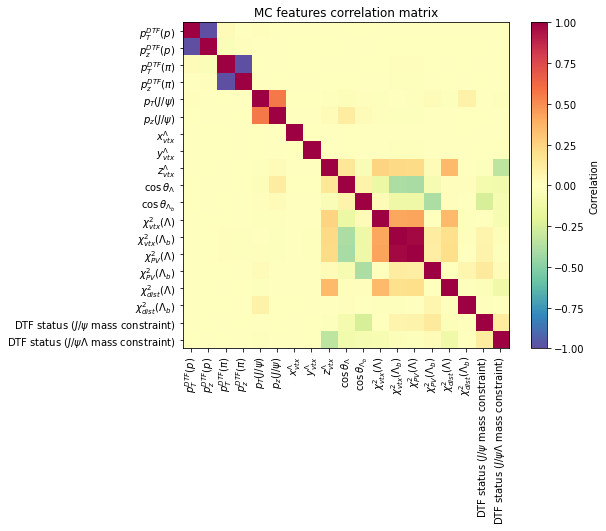

In [23]:
plt.figure(figsize=(8,6))
plt.matshow(MC_covDF, cmap='Spectral_r',fignum=0) ## Fignum=0 plots on current figure (matshow creates a new one by default)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("MC features correlation matrix")
ax = plt.gca() 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([featureLabels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([featureLabels[feature] for feature in features])
plt.savefig('plots/BDT_DTF_FixJpsiLambda/MC_covMatrix.pdf', bbox_inches='tight')
plt.show()

Anticorrelation between a particle's transverse and longitudinal momenta as estimated by the $\texttt{DecayTreeFitter}$ seems to be a mistake by the correlation algorithm used by pandas.

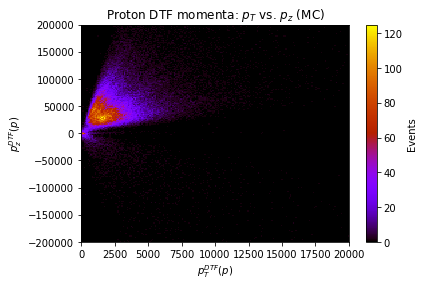

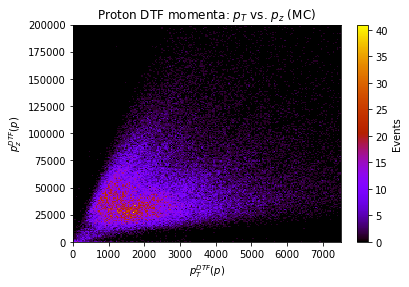

In [24]:
plt.hist2d(df_MC_Filtered['DTF_FixJPsiLambda_p_PT'], df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'],
           bins=200, cmap='gnuplot', range=[[0,2e4],[-2e5,2e5]])
plt.title("Proton DTF momenta: $p_T$ vs. $p_z$ (MC)")
plt.xlabel("$p_T^{DTF}(p)$")
plt.ylabel("$p_z^{DTF}(p)$")
plt.colorbar(label='Events')
plt.savefig('plots/BDT_DTF_FixJpsiLambda/MC_P_PT-vs-PZ.pdf', bbox_inches='tight')
plt.show()

plt.hist2d(df_MC_Filtered['DTF_FixJPsiLambda_p_PT'], df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'],
           bins=200, cmap='gnuplot', range=[[0,7500],[0,2e5]])
plt.title("Proton DTF momenta: $p_T$ vs. $p_z$ (MC)")
plt.xlabel("$p_T^{DTF}(p)$")
plt.ylabel("$p_z^{DTF}(p)$")
plt.colorbar(label='Events')
plt.show()

As seen above, most events display a large *correlation* between $p_z^{DTF}$ and $p_T^{DTF}$. A small number of "backscattering" particles is anti-correlated.

In [25]:
df_MC_Filtered.loc[df_MC_Filtered['DTF_FixJPsiLambda_p_PZ'] < -6e11][['DTF_FixJPsiLambda_p_PT','DTF_FixJPsiLambda_p_PZ']]

,DTF_FixJPsiLambda_p_PT,DTF_FixJPsiLambda_p_PZ
Rec_key,,
264155,7.948684e+10,-8.699826e+11


I suspect this single abnormal event might be the culprit.

In [26]:
SB_covDF = df_Data_Sideband[features].corr()
SB_covDF

,DTF_FixJPsiLambda_p_PT,DTF_FixJPsiLambda_p_PZ,DTF_FixJPsiLambda_pim_PT,DTF_FixJPsiLambda_pim_PZ,Jpsi_PT,Jpsi_PZ,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,L_BPVDIRA,Lb_BPVDIRA,L_VFASPF_CHI2_VDOF,Lb_VFASPF_CHI2_VDOF,L_BPVIPCHI2,Lb_BPVIPCHI2,L_BPVVDCHI2,Lb_BPVVDCHI2,DTF_FixJPsi_status,DTF_FixJPsiLambda_status
DTF_FixJPsiLambda_p_PT,1.000000,0.989251,0.293084,-0.166538,-0.000979,-0.001166,0.000700,0.000411,-0.004436,-0.005698,-0.004357,-0.001116,0.001233,0.001501,-0.000506,-0.000808,-0.000301,0.003311,-0.000216
DTF_FixJPsiLambda_p_PZ,0.989251,1.000000,0.270526,-0.191337,-0.000697,-0.001145,0.000783,0.000305,-0.004012,-0.005468,-0.004558,-0.000967,0.000874,0.001085,-0.001585,-0.000700,-0.000284,0.002841,-0.000189
DTF_FixJPsiLambda_pim_PT,0.293084,0.270526,1.000000,-0.646875,-0.005033,-0.002053,0.000650,-0.001162,-0.007612,-0.003529,-0.002714,0.001489,0.006739,0.006593,0.005703,-0.004734,-0.000017,0.003573,0.009839
DTF_FixJPsiLambda_pim_PZ,-0.166538,-0.191337,-0.646875,1.000000,-0.002135,-0.001381,-0.001267,-0.000266,0.005744,0.007068,0.003614,-0.001249,-0.004391,-0.004400,-0.005505,0.000003,0.000538,0.004077,-0.001466
Jpsi_PT,-0.000979,-0.000697,-0.005033,-0.002135,1.000000,0.475936,0.009918,0.003061,0.003167,-0.064077,0.103427,0.007120,0.031957,0.044011,0.056181,0.018104,-0.023807,0.063535,-0.028414
Jpsi_PZ,-0.001166,-0.001145,-0.002053,-0.001381,0.475936,1.000000,0.000522,-0.009140,0.003277,-0.115970,0.011832,0.051129,0.046775,0.047964,-0.017766,0.033179,-0.041586,0.042123,-0.000257
L_ENDVERTEX_X,0.000700,0.000783,0.000650,-0.001267,0.009918,0.000522,1.000000,0.006320,-0.026201,0.006829,-0.000946,-0.001333,0.006360,0.007364,0.001163,-0.017203,0.003074,0.000431,0.006185
L_ENDVERTEX_Y,0.000411,0.000305,-0.001162,-0.000266,0.003061,-0.009140,0.006320,1.000000,-0.044305,0.040460,0.005131,-0.021242,-0.009920,-0.008247,0.001735,-0.024703,0.003979,-0.007661,-0.002624
L_ENDVERTEX_Z,-0.004436,-0.004012,-0.007612,0.005744,0.003167,0.003277,-0.026201,-0.044305,1.000000,0.290016,-0.000611,-0.143207,-0.148632,-0.159879,-0.031998,0.344379,-0.005268,-0.040299,-0.127601
L_BPVDIRA,-0.005698,-0.005468,-0.003529,0.007068,-0.064077,-0.115970,0.006829,0.040460,0.290016,1.000000,0.018239,-0.332095,-0.536488,-0.554627,-0.005039,-0.063658,-0.002780,-0.120721,-0.104803


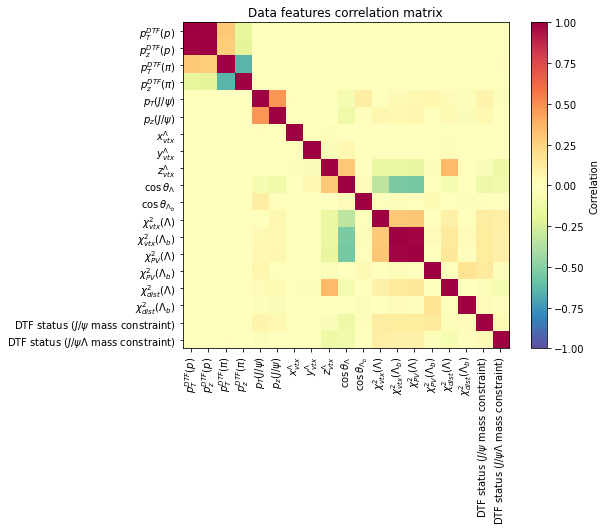

In [27]:
plt.figure(figsize=(8,6))
plt.matshow(SB_covDF, cmap='Spectral_r', fignum=0)
plt.clim(-1,1)
plt.colorbar(label='Correlation')
plt.title("Data features correlation matrix")
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.xaxis.set_major_locator(ticker.FixedLocator(range(0,len(features))))
ax.set_xticklabels([featureLabels[feature] for feature in features], rotation='vertical')
ax.set_yticklabels([featureLabels[feature] for feature in features])
plt.savefig('plots/BDT_DTF_FixJpsiLambda/SB_covMatrix.pdf', bbox_inches='tight')
plt.show()

When processing real data, the correlation algorithm correctly recognizes the heavy correlation between DTF transverse and longitudinal momenta for the proton. Pions are less lucky (same problem as before).

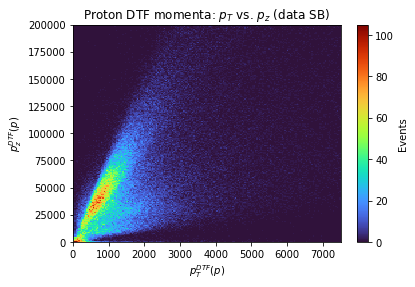

In [28]:
plt.hist2d(df_Data_Sideband['DTF_FixJPsiLambda_p_PT'], df_Data_Sideband['DTF_FixJPsiLambda_p_PZ'],
           bins=200, cmap='turbo', range=[[0,7500],[0,2e5]])
plt.title("Proton DTF momenta: $p_T$ vs. $p_z$ (data SB)")
plt.xlabel("$p_T^{DTF}(p)$")
plt.ylabel("$p_z^{DTF}(p)$")
plt.colorbar(label='Events')
plt.show()

## Train and test data
### Signal data (type 1)

Sample 100% of signal. That is, scramble the data frame.

In [29]:
df_signal = df_MC_Filtered.sample(frac=1, random_state=98)
df_signal['TYPE'] = 1
df_signal

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key,p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT,TYPE
Rec_key,,,,,,,,,,,,,,,,,,,,,
352003,0.9900,0.0169,3.300000,116.388496,30.117701,6282.886719,1290.660034,252.080002,66415.468750,197.050003,...,-641.391113,19495.591797,T,8575751,1499.261230,1339.061157,142.576462,239.662476,3483.928467,1
265235,1.0184,0.1609,39.636501,962.438599,463.805511,7189.831543,8050.549805,3783.229980,59438.179688,1006.159973,...,3637.840332,55652.945312,T,6484636,6531.696777,7250.666016,1098.382568,1083.654663,8100.985840,1
148181,0.7204,-0.3519,57.459000,-193.378693,-403.258698,6942.271973,-1085.930054,-2357.689941,41237.300781,-240.050003,...,1025.370605,48962.398438,T,3663879,1195.592285,2590.605225,600.855042,474.126373,314.042480,1
142519,3.3923,0.6250,-4.199400,938.192383,191.425995,5742.935547,10825.129883,2139.020020,66201.109375,1162.140015,...,65.273163,17206.941406,T,3529217,8357.870117,10886.081055,954.039429,1106.244019,6472.403320,1
242204,0.8681,1.4937,8.098100,-151.000793,112.281601,4932.158691,-1066.640015,852.979980,33873.550781,-219.490005,...,3946.147217,48469.367188,T,5933505,931.300659,1152.498901,812.275085,289.336945,4190.266602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254053,0.8669,0.1186,-20.466700,-109.663101,-47.713299,7491.895508,-818.690002,-339.369995,49225.160156,-17.280001,...,1600.304932,23268.414062,T,6216172,736.067566,866.862000,41.733448,29.015322,2405.740723,1
82685,1.2139,-0.9886,80.126602,256.224915,-405.731506,6392.206543,2266.000000,-3699.520020,58149.429688,662.109985,...,-2979.935547,43434.093750,T,2048916,4044.346680,4354.338379,1076.822876,1156.929077,2567.075439,1
325358,1.3912,0.3859,82.847298,543.844421,-61.370899,5650.757324,2838.750000,-257.529999,29827.970703,657.669983,...,712.099365,24441.621094,T,7930482,3212.848877,2977.199707,300.460205,571.568848,4692.720215,1


### Sidebands (type 0)

In [30]:
df_background  = df_Data_Sideband.sample(frac=1, random_state=98)
df_background['TYPE'] = 0
df_background

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT,TYPE
28897,0.642704,-0.484829,-19.538637,-66.521678,-41.245603,5718.943484,0.6430,-0.4841,-19.5435,-509.996756,...,7136.488770,-1850.011841,-4024.802979,47781.570312,1163.196581,155.039932,410.491535,9232.249023,4941.192695,0
459044,0.949720,0.141961,-17.777687,-58.294443,-161.454433,7014.824834,0.9509,0.1431,-17.7690,-957.007934,...,18252.222656,592.172791,1839.569092,12046.143555,1919.734870,7097.678711,1166.447101,1349.979004,1101.150685,0
185001,0.770393,0.028391,1.206817,-1261.291922,2.754168,7526.806847,0.7705,0.0283,1.2093,-2661.591285,...,10935.476562,1031.184448,-2603.352783,42431.714844,2032.556586,3546.886475,269.843432,97.409195,2028.476589,0
142856,0.829848,-0.246675,16.307852,98.091390,7.922506,6592.827375,0.8307,-0.2465,16.3120,1215.891286,...,8446.179688,-478.738068,-498.062378,34485.742188,564.124739,1476.258301,498.342746,58.872524,1176.263813,0
488176,1.000577,-0.004293,59.323659,152.458419,56.572256,7907.576215,0.9890,0.0010,59.2685,475.039922,...,18037.322266,-20.829746,543.355103,6826.803223,451.150732,827.602844,60.362110,48.976830,3820.855353,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53960,0.769625,-0.137157,-1.921042,333.144757,-38.314677,7726.183021,0.7695,-0.1370,-1.9239,1414.586463,...,59942.222656,1640.821777,-1948.986938,38782.527344,645.364567,12712.377930,757.699363,5040.844727,2990.624457,0
192992,0.874200,-0.307568,8.344550,26.918351,102.189184,7123.010733,0.8658,-0.3103,8.3867,-25.430545,...,15444.047852,-273.093170,-446.432861,17866.273438,592.379896,1599.084717,315.389950,677.035889,3759.275156,0
105515,1.507326,-1.055930,53.047628,-57.905745,182.407189,7814.761008,1.5095,-1.0582,53.0698,-441.493965,...,37963.652344,1533.877563,-2071.187500,18043.048828,636.473898,7521.579102,799.192766,5866.992188,3322.858089,0
358893,0.774382,-0.002810,58.849712,-75.592934,149.248888,7464.667601,0.7751,-0.0029,58.8506,-527.174437,...,8977.818359,-1748.669922,259.170074,10938.573242,681.055386,986.649902,643.814391,1912.016602,613.784354,0


## Merge signal & background
Reserve 10% of data of testing purposes.

In [31]:
## Splitting points at 90% of the DF length
signalSplitPoint = int(len(df_signal) * 0.9)
backgroundSplitPoint = int(len(df_background) * 0.9)

In [32]:
df_train = pd.concat([df_signal.iloc[:signalSplitPoint], df_background.iloc[:backgroundSplitPoint]], ignore_index=True)
df_train.dropna('columns', inplace=True)
df_test = pd.concat([df_signal.iloc[signalSplitPoint:], df_background.iloc[backgroundSplitPoint:]], ignore_index=True)
df_test.dropna('columns', inplace=True)

In [33]:
df_train

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT,TYPE
0,0.990684,0.038438,3.720320,117.838326,29.838898,6333.288086,0.9906,0.0386,3.717400,1307.867554,...,75179.382812,-954.128357,-641.391113,19495.591797,1499.261230,1339.061157,142.576462,239.662476,3483.928467,1
1,0.964242,0.134459,39.105392,1093.493652,531.495728,8164.981934,0.9644,0.1345,39.107300,7001.500977,...,22976.921875,5065.811035,3637.840332,55652.945312,6531.696777,7250.666016,1098.382568,1083.654663,8100.985840,1
2,0.675460,-0.328716,57.463936,-197.189377,-422.015839,7067.048828,0.6725,-0.3235,57.414001,-1354.853271,...,11271.579102,-65.253616,1025.370605,48962.398438,1195.592285,2590.605225,600.855042,474.126373,314.042480,1
3,3.361676,0.599952,-4.398020,988.086487,194.970932,6042.386719,3.3619,0.6001,-4.396900,10664.260742,...,24429.681641,1660.942749,65.273163,17206.941406,8357.870117,10886.081055,954.039429,1106.244019,6472.403320,1
4,0.867931,1.494975,8.201304,-180.168259,113.960808,5644.292969,0.8679,1.4951,8.201700,-1396.519409,...,13889.977539,344.370178,3946.147217,48469.367188,931.300659,1152.498901,812.275085,289.336945,4190.266602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228493,1.005732,-0.220347,32.988498,18.627730,116.665470,6149.815967,1.0062,-0.2201,32.990900,411.756683,...,8431.462891,-29.524315,-817.325439,20130.509766,1220.226567,1239.802612,1089.563873,584.398865,1239.946333,0
228494,0.804993,-0.173207,-13.192062,110.454714,60.595216,7083.125185,0.8049,-0.1732,-13.192500,1235.938957,...,48570.027344,1171.188232,-407.516663,6362.224121,1083.955904,892.092041,450.382581,346.130585,3907.140734,0
228495,1.151555,-0.098889,69.969779,-91.669910,-16.708251,7082.764803,1.1452,-0.0946,69.896100,-805.570901,...,42489.683594,-276.901367,-709.275146,21006.623047,567.501520,1658.590454,398.880250,94.031776,4557.561173,0
228496,0.785419,-0.684213,15.040096,49.366265,165.600026,7805.884814,0.7835,-0.6829,15.004600,390.427716,...,41657.515625,-112.497192,-1661.988892,72489.250000,758.780272,7304.916016,705.825113,5091.433594,234.577613,0


In [34]:
df_test

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT,TYPE
0,1.253080,-0.013686,-23.442694,513.993103,355.759460,7081.937988,1.2531,-0.0137,-23.4426,2381.848145,...,6740.607910,4515.231934,1748.720703,28718.853516,2504.376465,2798.346191,416.471710,536.600769,5507.754883,1
1,0.668820,0.064336,-27.951580,-764.740417,714.845032,8306.612305,0.6686,0.0645,-27.9503,-5884.256348,...,18033.630859,70.930359,-774.841553,12357.408203,3678.204834,4010.383301,511.451996,497.234833,2331.964111,1
2,0.847229,0.204735,-13.084999,121.949402,790.637390,7902.954102,0.8472,0.2047,-13.0850,1033.767944,...,6063.832031,-1797.591675,2137.468750,16436.371094,6151.153320,3191.249023,908.855103,883.122070,2105.087891,1
3,0.713268,0.786892,-14.592052,-361.638855,867.828552,6799.666504,0.7133,0.7868,-14.5923,-1406.193359,...,14730.555664,1659.500854,2407.391602,11760.000977,2215.048828,3299.109375,1217.576172,1064.717407,5490.721191,1
4,0.448908,-0.015346,-23.151735,-175.256287,-99.867805,5772.698242,0.4490,-0.0154,-23.1549,-2125.384766,...,111201.039062,-1779.702271,2596.198486,111356.656250,1299.116333,1661.818237,1164.087158,573.867249,6432.109863,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25385,0.769625,-0.137157,-1.921042,333.144757,-38.314677,7726.183021,0.7695,-0.1370,-1.9239,1414.586463,...,59942.222656,1640.821777,-1948.986938,38782.527344,645.364567,12712.377930,757.699363,5040.844727,2990.624457,0
25386,0.874200,-0.307568,8.344550,26.918351,102.189184,7123.010733,0.8658,-0.3103,8.3867,-25.430545,...,15444.047852,-273.093170,-446.432861,17866.273438,592.379896,1599.084717,315.389950,677.035889,3759.275156,0
25387,1.507326,-1.055930,53.047628,-57.905745,182.407189,7814.761008,1.5095,-1.0582,53.0698,-441.493965,...,37963.652344,1533.877563,-2071.187500,18043.048828,636.473898,7521.579102,799.192766,5866.992188,3322.858089,0
25388,0.774382,-0.002810,58.849712,-75.592934,149.248888,7464.667601,0.7751,-0.0029,58.8506,-527.174437,...,8977.818359,-1748.669922,259.170074,10938.573242,681.055386,986.649902,643.814391,1912.016602,613.784354,0


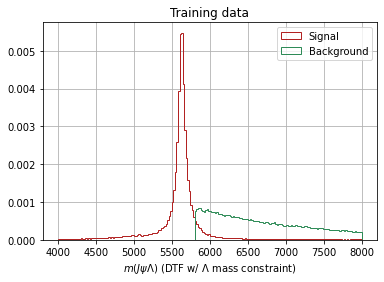

In [35]:
plt.hist(df_train.loc[df_train['TYPE'] == 1, 'DTF_FixJPsiLambda_Lb_M'],bins=200,range=(4000,8000),
        color='firebrick', label='Signal', density=True, histtype='step')
plt.hist(df_train.loc[df_train['TYPE'] == 0, 'DTF_FixJPsiLambda_Lb_M'],bins=200,range=(4000,8000),
        color='seagreen', label='Background', density=True, histtype='step')
plt.grid()
plt.xlabel("$m(J\psi \Lambda)$ (DTF w/ $\Lambda$ mass constraint)")
plt.title("Training data")
plt.legend()
plt.show()

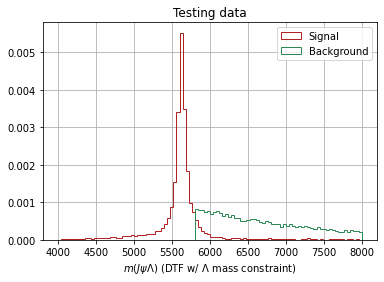

In [36]:
plt.hist(df_test.loc[df_test['TYPE'] == 1, 'DTF_FixJPsiLambda_Lb_M'],bins=100,range=(4000,8000),
        color='firebrick', label='Signal', density=True, histtype='step')
plt.hist(df_test.loc[df_test['TYPE'] == 0, 'DTF_FixJPsiLambda_Lb_M'],bins=100,range=(4000,8000),
        color='seagreen', label='Background', density=True, histtype='step')
plt.grid()
plt.title("Testing data")
plt.legend()
plt.xlabel("$m(J\psi \Lambda)$ (DTF w/ $\Lambda$ mass constraint)")
plt.show()

# Train the classifier

In [37]:
X_train = df_train.loc[:, features].to_numpy()
Y_train = df_train.loc[:, 'TYPE'].to_numpy()

In [38]:
if load_existing:
    tickBDTImport = time.perf_counter()
    BDT = joblib.load('BDT_DTF.joblib')
    tockBDTImport = time.perf_counter()
    print(f"BDT imorted in {(tockBDTImport - tickBDTImport):0.4f} seconds.")
else:
    BDT = ensemble.GradientBoostingClassifier(
        random_state=2021,
        learning_rate=0.05,
        max_depth=6,
        max_features=3,
        n_estimators=1000  
    )
    
    tickBDT = time.perf_counter()
    BDT.fit(X_train, Y_train)
    tockBDT = time.perf_counter()
    print(f"BDT trained in {(tockBDT - tickBDT)/60:0.4f} minutes.")
    
    
    if save_model:
        tickSave = time.perf_counter()
        joblib.dump(BDT, 'BDT_DTF.joblib')
        tockSave = time.perf_counter()
        print(f"BDT saved in {(tockSave - tickSave)/60:0.4f} minutes.")

BDT imorted in 0.6488 seconds.


# Classifier results
## On training dataset

In [39]:
Y_train_predicted = BDT.predict(X_train)
Y_train_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
## predict_proba returns a NumberOfEvents * NumberOfClasses matrix
## The way we have defined it, the second column is the probability of class 1 (i.e. signal)
## Therefore we get that one
Y_train_proba_predicted = BDT.predict_proba(X_train)[:,1]
Y_train_proba_predicted

array([9.52492009e-01, 9.86084912e-01, 9.78223063e-01, ...,
       6.48498653e-05, 7.96401156e-04, 4.41933410e-04])

### Confusion matrix

In [41]:
confusionMatrix = metrics.confusion_matrix(Y_train,Y_train_predicted)
confusionMatrix = confusionMatrix/np.sum(confusionMatrix)

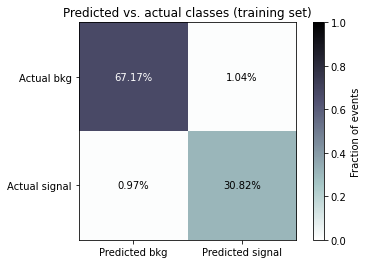

In [42]:
plt.imshow(confusionMatrix, cmap='bone_r')
ax = plt.gca()
plt.colorbar(label='Fraction of events')
plt.clim(0,1)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted bkg', 'Predicted signal'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual bkg', 'Actual signal'))
plt.text(0, 1, "{:.2%}".format(confusionMatrix[1, 0]), ha='center', va='center', color='k')
plt.text(0, 0, "{:.2%}".format(confusionMatrix[0, 0]), ha='center', va='center', color='w')
plt.text(1, 0, "{:.2%}".format(confusionMatrix[0, 1]), ha='center', va='center', color='k')
plt.text(1, 1, "{:.2%}".format(confusionMatrix[1, 1]), ha='center', va='center', color='k')
plt.title("Predicted vs. actual classes (training set)")
plt.show()

### Classification report

In [43]:
print(metrics.classification_report(Y_train, Y_train_predicted))
print(f'The average precision score on training data is: {metrics.average_precision_score(Y_train, Y_train_proba_predicted):.4f}')

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    155849
           1       0.97      0.97      0.97     72649

    accuracy                           0.98    228498
   macro avg       0.98      0.98      0.98    228498
weighted avg       0.98      0.98      0.98    228498

The average precision score on training data is: 0.9959


### ROC curve

In [44]:
falsePositiveRates, truePositiveRates, thresholds = metrics.roc_curve(Y_train, Y_train_proba_predicted)
areaUnderCurve = metrics.roc_auc_score(Y_train, Y_train_proba_predicted)

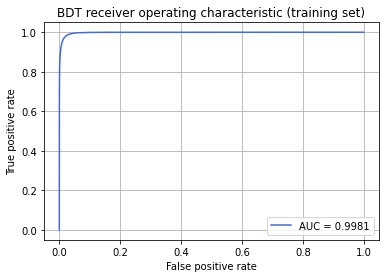

In [45]:
plt.plot(falsePositiveRates, truePositiveRates, label=f'AUC = {areaUnderCurve:.4f}', color='royalblue')
plt.grid()
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("BDT receiver operating characteristic (training set)")
plt.show()

### Precision-recall curve

In [46]:
train_Precisions, train_Recalls, train_PRC_Thresholds = metrics.precision_recall_curve(Y_train, Y_train_proba_predicted)

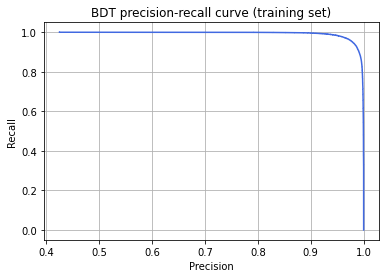

In [47]:
plt.plot(train_Precisions, train_Recalls, color='royalblue')
plt.grid()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("BDT precision-recall curve (training set)")
plt.show()

## On testing dataset

In [48]:
X_test = df_test.loc[:, features].to_numpy()
Y_test = df_test.loc[:, 'TYPE'].to_numpy()

In [49]:
Y_test_predicted = BDT.predict(X_test)
Y_test_proba_predicted = BDT.predict_proba(X_test)[:,1]

### Confusion matrix

In [50]:
confusionMatrix_Test = metrics.confusion_matrix(Y_test,Y_test_predicted)
confusionMatrix_Test = confusionMatrix_Test/np.sum(confusionMatrix_Test)

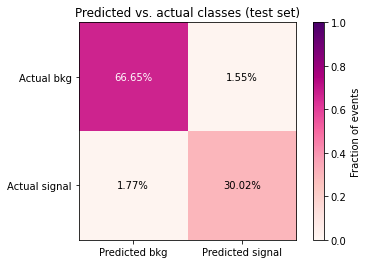

In [51]:
plt.imshow(confusionMatrix_Test, cmap='RdPu')
ax = plt.gca()
plt.colorbar(label='Fraction of events')
plt.clim(0,1)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted bkg', 'Predicted signal'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual bkg', 'Actual signal'))
plt.text(0, 1, "{:.2%}".format(confusionMatrix_Test[1, 0]), ha='center', va='center', color='k')
plt.text(0, 0, "{:.2%}".format(confusionMatrix_Test[0, 0]), ha='center', va='center', color='w')
plt.text(1, 0, "{:.2%}".format(confusionMatrix_Test[0, 1]), ha='center', va='center', color='k')
plt.text(1, 1, "{:.2%}".format(confusionMatrix_Test[1, 1]), ha='center', va='center', color='k')
plt.title("Predicted vs. actual classes (test set)")
plt.show()

### Classification report

In [52]:
print(metrics.classification_report(Y_test, Y_test_predicted))
print(f'The average precision score on test data is: {metrics.average_precision_score(Y_test, Y_test_proba_predicted):.4f}')

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17317
           1       0.95      0.94      0.95      8073

    accuracy                           0.97     25390
   macro avg       0.96      0.96      0.96     25390
weighted avg       0.97      0.97      0.97     25390

The average precision score on test data is: 0.9883


### ROC curve

In [53]:
test_FalsePositiveRates, test_TruePositiveRates, test_Thresholds = metrics.roc_curve(Y_test, Y_test_proba_predicted)
test_areaUnderCurve = metrics.roc_auc_score(Y_test, Y_test_proba_predicted)

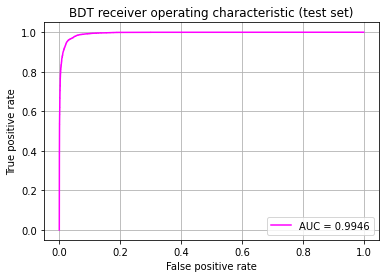

In [54]:
plt.plot(test_FalsePositiveRates, test_TruePositiveRates, label=f'AUC = {test_areaUnderCurve:.4f}', color='fuchsia')
plt.grid()
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("BDT receiver operating characteristic (test set)")
plt.show()

### Precision-recall curve

In [55]:
test_Precisions, test_Recalls, test_PRC_Thresholds = metrics.precision_recall_curve(Y_test, Y_test_proba_predicted)

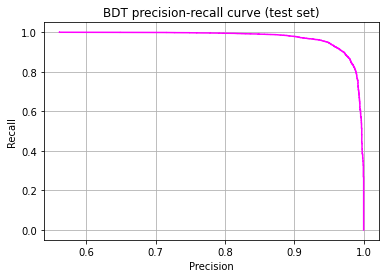

In [56]:
plt.plot(test_Precisions, test_Recalls, color='fuchsia')
plt.grid()
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title("BDT precision-recall curve (test set)")
plt.show()

## Distribution of response

In [57]:
lightOrangeFaceColor = (247/255, 215/255, 126/255, 0.2)
lightBlueFaceColor = (139/255, 197/255, 214/255, 0.2)
lightFuchsiaFaceColor = (236/255, 175/255, 237/255, 0.2)
lightGreenFaceColor = (188/255, 237/255, 187/255, 0.2)

In [58]:
df_model_response_train = pd.DataFrame({'predicted' : Y_train_proba_predicted, 'class' : Y_train, 'dataset': 'train'})
df_model_response_test = pd.DataFrame({'predicted' : Y_test_proba_predicted, 'class' : Y_test, 'dataset': 'test'})
df_model_response = pd.concat([df_model_response_train, df_model_response_test], ignore_index=True)

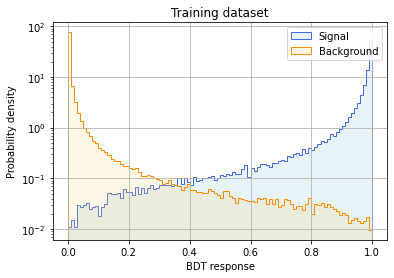

In [59]:
plt.hist(
    df_model_response[(df_model_response['dataset'] == 'train') & (df_model_response['class'] == 1)]['predicted'],
    label='Signal',
    bins=100,
    range=(0,1),
    fc=lightBlueFaceColor,
    edgecolor='royalblue',
    histtype= "stepfilled",
    density=True
)

plt.hist(
    df_model_response[(df_model_response['dataset'] == 'train') & (df_model_response['class'] == 0)]['predicted'],
    label='Background',
    bins=100,
    range=(0,1),
    fc=lightOrangeFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='darkorange',
)

plt.yscale('log')
plt.legend()
plt.grid()
plt.title("Training dataset")
plt.ylabel("Probability density")
plt.xlabel("BDT response")
plt.show()

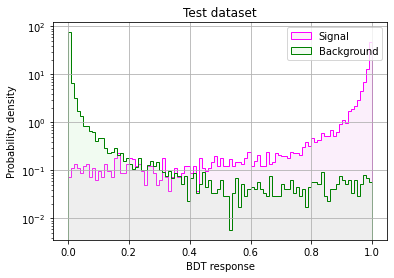

In [60]:
plt.hist(
    df_model_response[(df_model_response['dataset'] == 'test') & (df_model_response['class'] == 1)]['predicted'],
    label='Signal',
    bins=100,
    range=(0,1),
    fc=lightFuchsiaFaceColor,
    edgecolor='fuchsia',
    histtype= "stepfilled",
    density=True
)

plt.hist(
    df_model_response[(df_model_response['dataset'] == 'test') & (df_model_response['class'] == 0)]['predicted'],
    label='Background',
    bins=100,
    range=(0,1),
    fc=lightGreenFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='green',
)

plt.yscale('log')
plt.legend()
plt.grid()
plt.title("Test dataset")
plt.ylabel("Probability density")
plt.xlabel("BDT response")
plt.show()

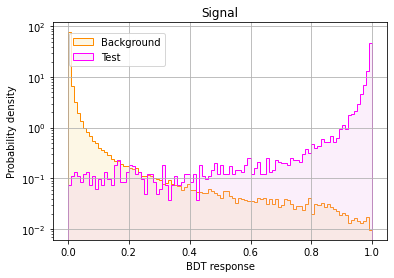

In [61]:
plt.hist(
    df_model_response[(df_model_response['dataset'] == 'train') & (df_model_response['class'] == 0)]['predicted'],
    label='Background',
    bins=100,
    range=(0,1),
    fc=lightOrangeFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='darkorange',
)

plt.hist(
    df_model_response[(df_model_response['dataset'] == 'test') & (df_model_response['class'] == 1)]['predicted'],
    label='Test',
    bins=100,
    range=(0,1),
    fc=lightFuchsiaFaceColor,
    edgecolor='fuchsia',
    histtype= "stepfilled",
    density=True
)

plt.yscale('log')
plt.legend(loc=(0.05,0.8))
plt.grid()
plt.title("Signal")
plt.ylabel("Probability density")
plt.xlabel("BDT response")
plt.show()

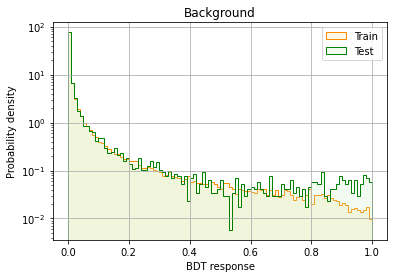

In [62]:
plt.hist(
    df_model_response[(df_model_response['dataset'] == 'train') & (df_model_response['class'] == 0)]['predicted'],
    label='Train',
    bins=100,
    range=(0,1),
    fc=lightOrangeFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='darkorange',
)

plt.hist(
    df_model_response[(df_model_response['dataset'] == 'test') & (df_model_response['class'] == 0)]['predicted'],
    label='Test',
    bins=100,
    range=(0,1),
    fc=lightGreenFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='green',
)

plt.yscale('log')
plt.legend()
plt.grid()
plt.title("Background")
plt.ylabel("Probability density")
plt.xlabel("BDT response")
plt.show()

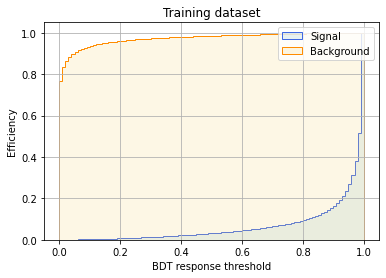

In [63]:
plt.hist(
    df_model_response[(df_model_response['dataset'] == 'train') & (df_model_response['class'] == 1)]['predicted'],
    label='Signal',
    bins=100,
    range=(0,1),
    fc=lightBlueFaceColor,
    edgecolor='royalblue',
    histtype= "stepfilled",
    density=True,
    cumulative=True
)

plt.hist(
    df_model_response[(df_model_response['dataset'] == 'train') & (df_model_response['class'] == 0)]['predicted'],
    label='Background',
    bins=100,
    range=(0,1),
    fc=lightOrangeFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='darkorange',
    cumulative=True
)

plt.legend()
plt.grid()
plt.title("Training dataset")
plt.ylabel("Efficiency")
plt.xlabel("BDT response threshold")
plt.show()

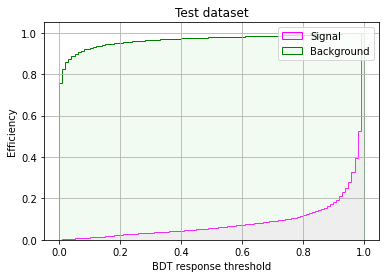

In [64]:
plt.hist(
    df_model_response[(df_model_response['dataset'] == 'test') & (df_model_response['class'] == 1)]['predicted'],
    label='Signal',
    bins=100,
    range=(0,1),
    fc=lightFuchsiaFaceColor,
    edgecolor='fuchsia',
    histtype= "stepfilled",
    density=True,
    cumulative=True
)

plt.hist(
    df_model_response[(df_model_response['dataset'] == 'test') & (df_model_response['class'] == 0)]['predicted'],
    label='Background',
    bins=100,
    range=(0,1),
    fc=lightGreenFaceColor,
    histtype= "stepfilled",
    density=True,
    edgecolor='green',
    cumulative=True
)

plt.legend()
plt.grid()
plt.title("Test dataset")
plt.ylabel("Efficiency")
plt.xlabel("BDT response threshold")
plt.show()

## Feature importance

In [65]:
importanceTick = time.perf_counter()
train_importances = inspection.permutation_importance(
    BDT,
    X_train,
    Y_train,
    scoring='average_precision',
    n_repeats=10,
    random_state=2021,
    n_jobs=10
)

test_importances = inspection.permutation_importance(
    BDT,
    X_test,
    Y_test,
    scoring='average_precision',
    n_repeats=10,
    random_state=2021,
    n_jobs=10
)

importanceTock = time.perf_counter()
print(f"Importances computed in {(importanceTock - importanceTick)/60:0.4f} minutes.")

Importances computed in 6.1208 minutes.


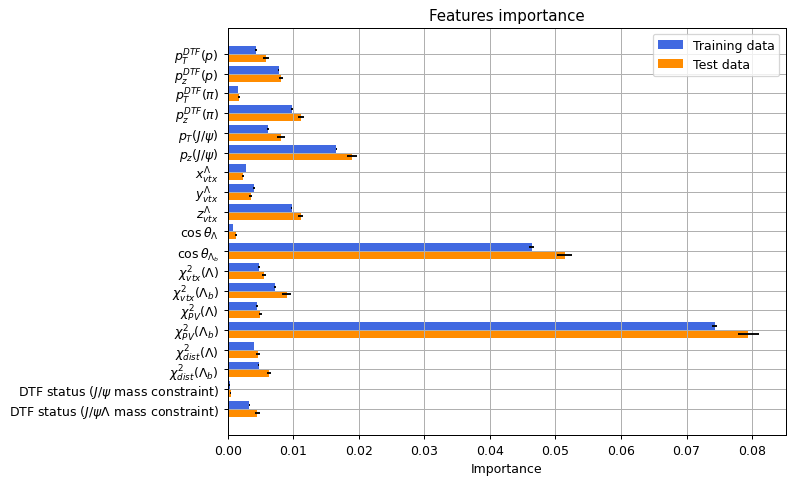

In [66]:
## Index: where we plot the bars
## bar_width: smaller so we can fit both training and test data
index = np.arange(len(features))
bar_width=0.4

plt.figure(figsize=(8, 6), dpi=90)

plt.barh(
    index,
    train_importances['importances_mean'],
    bar_width,
    xerr=train_importances['importances_std'],
    label='Training data',
    color='royalblue'
)

## Plot test data shifted by bar_width so it appears above test data
plt.barh(
    index+bar_width,
    test_importances['importances_mean'],
    bar_width,
    xerr=test_importances['importances_std'],
    label='Test data',
    color='darkorange'
)

plt.legend()
plt.title("Features importance")
plt.xlabel("Importance")

## Manually set labels position and text, since we used the index
ax = plt.gca()
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels([featureLabels[feature] for feature in features])

plt.grid()
plt.gca().invert_yaxis()
plt.show()